<a href="https://colab.research.google.com/github/CardosoJr/bootcamp/blob/main/Labs/Lab%202%20-%20EDA%20Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - Turnover 

Hipótese: 
* Podemos saber a propensão ao turnover por características do funcionário 

Tarefas: 
* Análise de qualidade dos dados
* Análise exploratória das características do funcionário 




### Leitura e Apresentação dos Dados

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

# Importando libs de plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
# sns.set_context('talk')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [3]:
pal = sns.color_palette('rainbow')
pal.as_hex()

['#386df9', '#12c8e6', '#5af8c8', '#a4f89f', '#ecc86f', '#ff6d38']

In [ ]:
str(pal.as_hex())

"['#386df9', '#12c8e6', '#5af8c8', '#a4f89f', '#ecc86f', '#ff6d38']"

In [4]:
df = pd.read_csv('turnover.csv')

In [5]:
df.head()

,Idade,Turnover,ViagensTrabalho,Departamento,DistanciaCasa,NivelEducacao,Educacao,NumeroEmpregado,NivelSatisfacaoAmbiente,Genero,PagamentoHora,Envolvimento,NivelCargo,Cargo,NivelSatisfacaoCargo,EstadoCivil,RendaMensal,QtdeEmpresasTrabalhadas,Acima18Anos,HoraExtra,PercentualAumentoSalario,AvaliacaoDesempenho,QtdeHorasTrabalhadasPadrao,TotalAnosTrabalhados,TreinamentosUltimoAno,BalanceamentoVidaTrabalho,QtdeAnosNaEmpresaAtual,QtdeAnosNoCargoAtual,QtdeAnosDesdeUltimaPromocao,QtdeAnosComGerenteAtual
0,41.0,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,80,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,80,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,80,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,80,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,80,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1325 non-null   float64
 1   Turnover                     1470 non-null   object 
 2   ViagensTrabalho              1470 non-null   object 
 3   Departamento                 1470 non-null   object 
 4   DistanciaCasa                1470 non-null   int64  
 5   NivelEducacao                1470 non-null   int64  
 6   Educacao                     1470 non-null   object 
 7   NumeroEmpregado              1470 non-null   int64  
 8   NivelSatisfacaoAmbiente      1470 non-null   int64  
 9   Genero                       1470 non-null   object 
 10  PagamentoHora                1470 non-null   int64  
 11  Envolvimento                 1470 non-null   int64  
 12  NivelCargo                   1470 non-null   int64  
 13  Cargo             

## Análise de Qualidade dos Dados
* Missing values 
* Valores inconsistentes 
* Zeros / Sem variação  

In [ ]:
df['Idade'].isna().sum() / len(df)

0.09863945578231292

In [ ]:
df['Idade'].mean()

36.827924528301885

In [ ]:
df['Idade'].median()

35.0

In [ ]:
pd.cut(df['TotalAnosTrabalhados'], bins = 4).value_counts()

(-0.04, 10.0]    923
(10.0, 20.0]     340
(20.0, 30.0]     161
(30.0, 40.0]      46
Name: TotalAnosTrabalhados, dtype: int64

In [7]:
df['FAIXA_DE_ANOS_TRABALHADOS'] = pd.qcut(df['TotalAnosTrabalhados'], q = 4)

In [8]:
df.groupby('FAIXA_DE_ANOS_TRABALHADOS')['Idade'].median()

FAIXA_DE_ANOS_TRABALHADOS
(-0.001, 6.0]    29.0
(6.0, 10.0]      35.0
(10.0, 15.0]     36.0
(15.0, 40.0]     46.0
Name: Idade, dtype: float64

In [ ]:
df.groupby('FAIXA_DE_ANOS_TRABALHADOS')['Idade'].transform('median')

0       35.0
1       35.0
2       35.0
3       35.0
4       29.0
        ... 
1465    46.0
1466    35.0
1467    29.0
1468    46.0
1469    29.0
Name: Idade, Length: 1470, dtype: float64

In [9]:
df['Idade'].fillna(df.groupby('FAIXA_DE_ANOS_TRABALHADOS')['Idade'].transform('median'), inplace = True)

In [10]:
df['Idade'].isna().sum()

0

## Análises Univariadas

In [ ]:
df['Turnover'].value_counts()

No     1233
Yes     237
Name: Turnover, dtype: int64

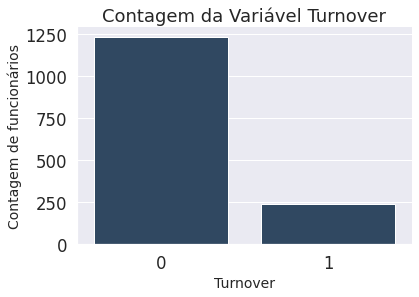

In [ ]:
sns.countplot('Turnover', data = df, color = '#284869')
_ = plt.title("Contagem da Variável Turnover")
plt.ylabel('Contagem de funcionários', fontsize = 14)
plt.xlabel('Turnover', fontsize = 14)
sns.despine()

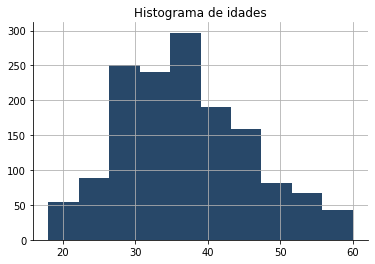

In [ ]:
df['Idade'].hist(color  = '#284869')
_ = plt.title('Histograma de idades')
sns.despine()

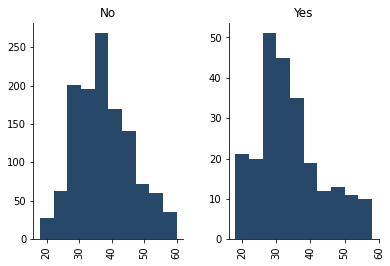

In [ ]:
df['Idade'].hist(color  = '#284869', by = df['Turnover'])
sns.despine()

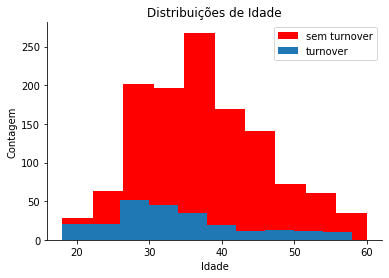

In [ ]:
ax = plt.subplot(111)
df.query("Turnover == 'No'")['Idade'].hist(ax = ax, label = 'sem turnover', color = 'red', grid=False)
df.query("Turnover == 'Yes'")['Idade'].hist(ax = ax, label = 'turnover', grid=False)
plt.legend()
plt.title('Distribuições de Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
sns.despine()

In [ ]:
bins = np.arange(df['Idade'].min(), df['Idade'].max(), 5)

hist, _ = np.histogram(df.query("Turnover == 'No'")['Idade'], bins = bins)
hist2, _ = np.histogram(df.query("Turnover == 'Yes'")['Idade'], bins = bins)

In [ ]:
bins

array([18., 23., 28., 33., 38., 43., 48., 53., 58.])

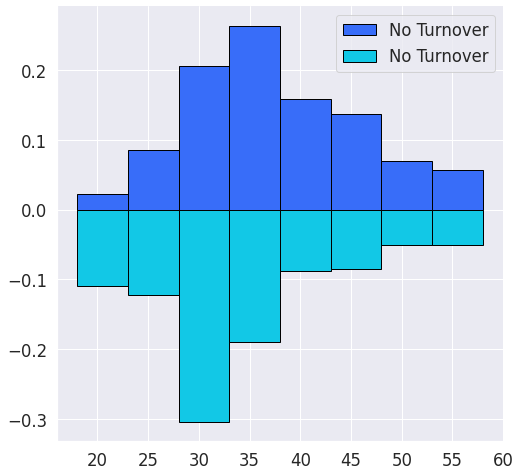

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))

ax.bar(bins[:-1], hist / np.sum(hist), width=np.diff(bins), edgecolor="black", align="edge", label = 'No Turnover');
ax.bar(bins[:-1], hist2 * -1 / np.sum(hist2), width=np.diff(bins), edgecolor="black", align="edge", label = 'No Turnover');
plt.legend()
sns.despine()


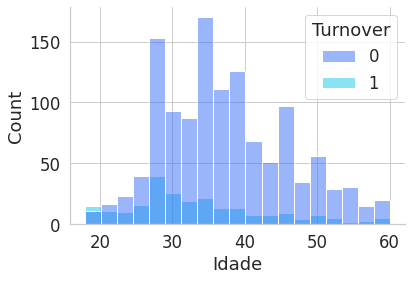

In [ ]:
sns.histplot(x = 'Idade', data = df, hue = 'Turnover')
sns.despine()

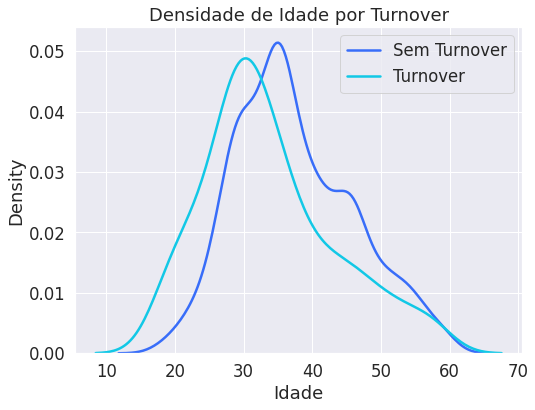

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.kdeplot(x = 'Idade', data = df.query('Turnover == "No"'), label = 'Sem Turnover', ax = ax);
sns.kdeplot(x = 'Idade', data = df.query('Turnover == "Yes"'), ax = ax, label = 'Turnover');
plt.legend();
plt.title('Densidade de Idade por Turnover');

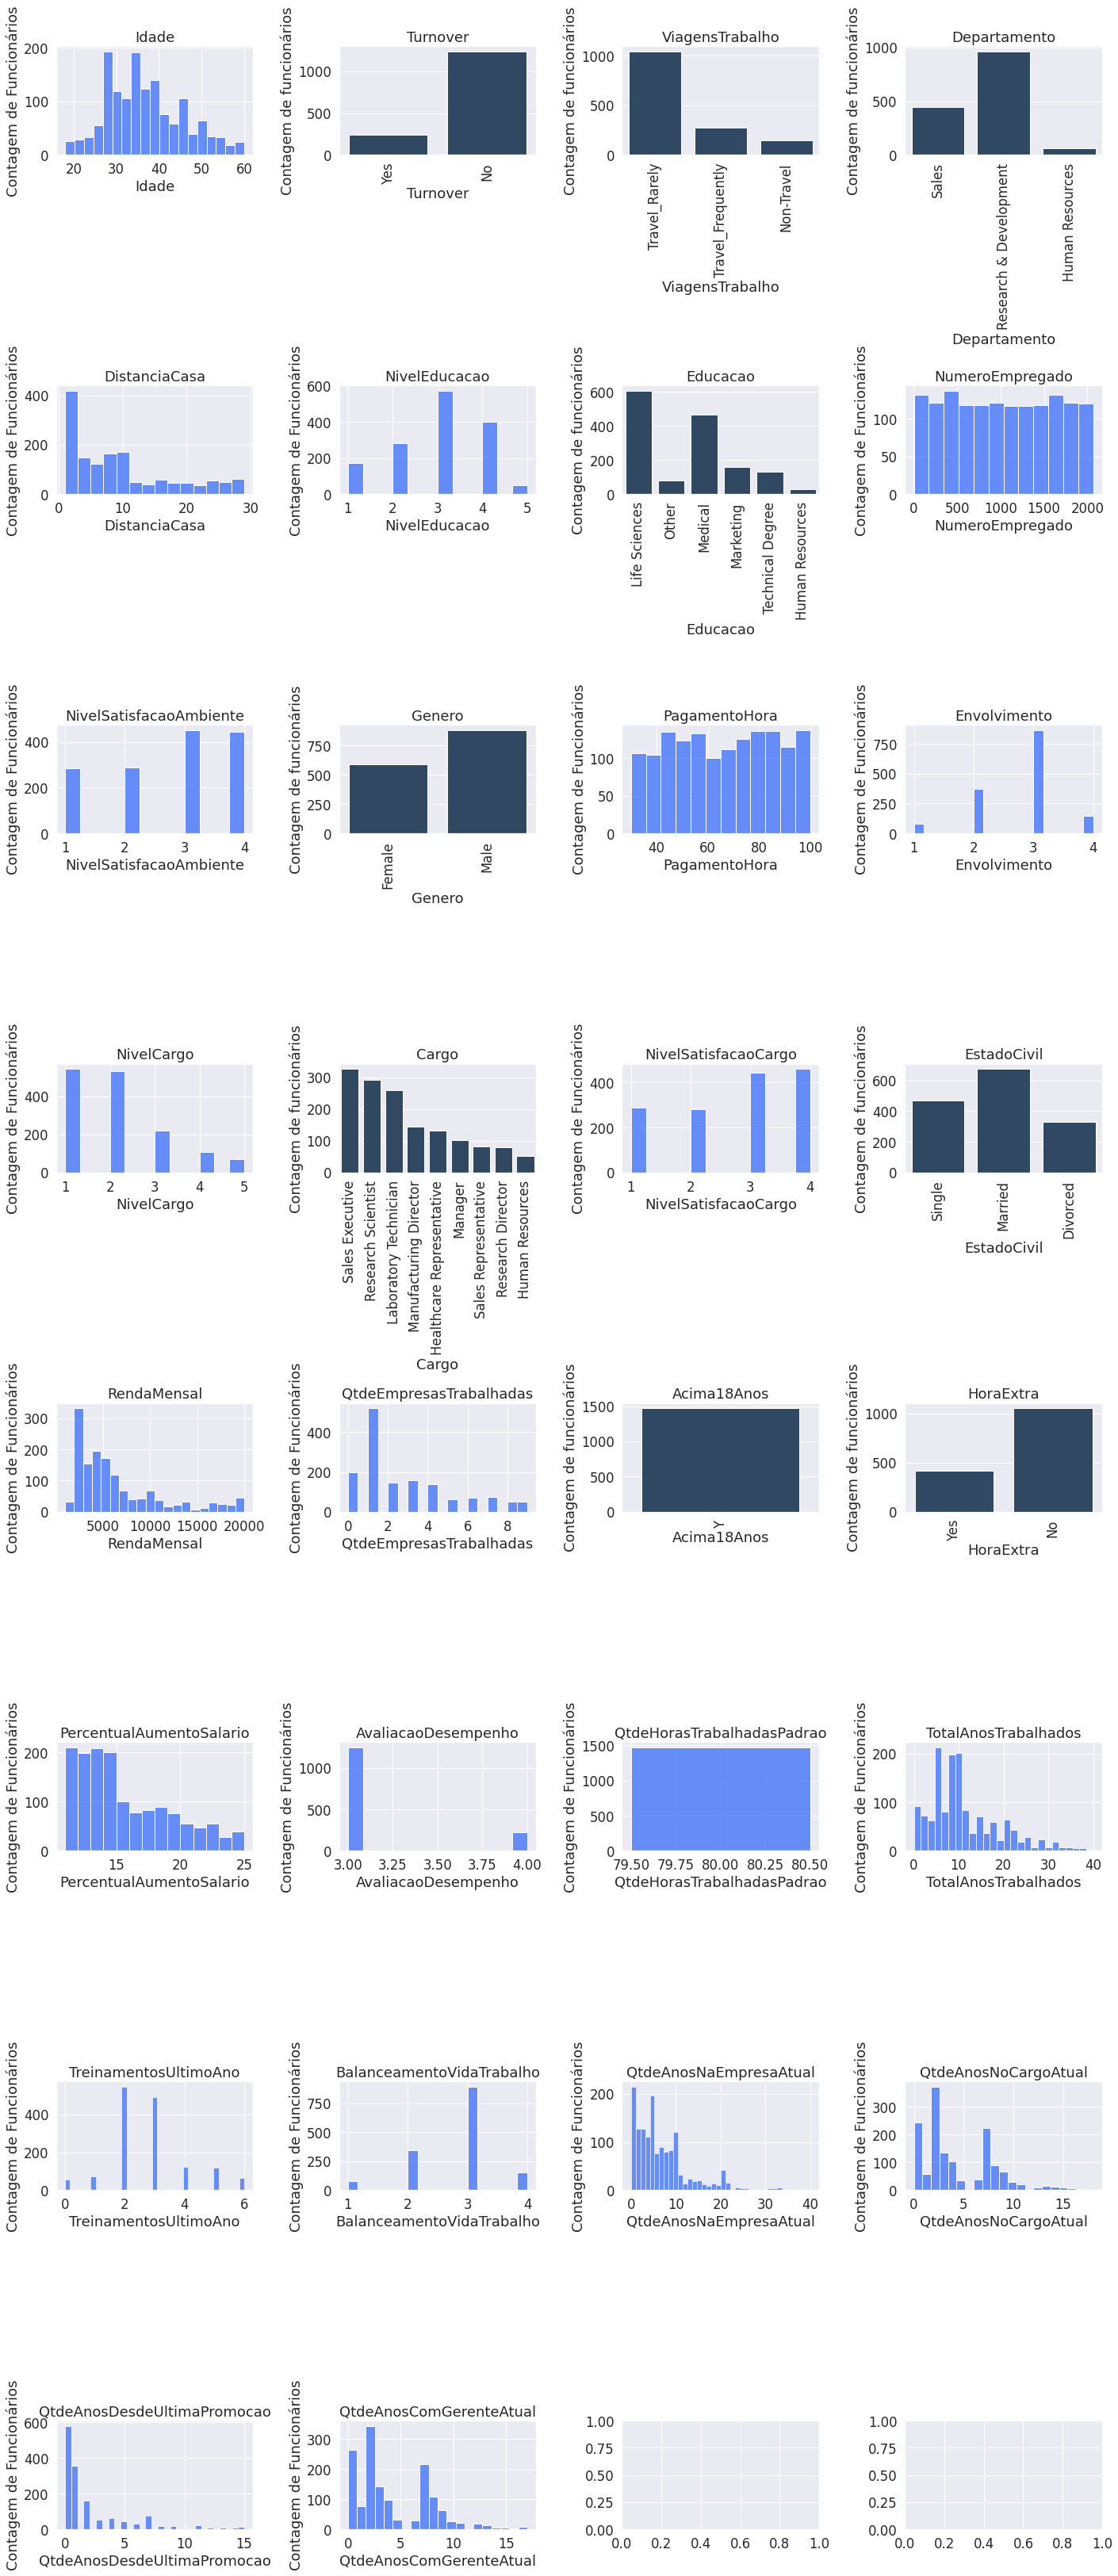

In [37]:
fig, ax = plt.subplots(int(np.ceil((len(df.columns) - 1) / 4)), 4, figsize = (20, 45))
ax = ax.flatten()

for i, col in enumerate(df.columns):
  if col == "FAIXA_DE_ANOS_TRABALHADOS":
    continue
  if df.dtypes[col] == 'object':
    sns.countplot(col, data = df, color = '#284869', ax = ax[i])
    ax[i].set_title(col)
    ax[i].set_ylabel('Contagem de funcionários')
    ax[i].set_xticklabels([x.get_text() for x in ax[i].get_xticklabels()], rotation = 90)
  else:
    sns.histplot(x = col, data = df, ax = ax[i])
    ax[i].set_title(col)
    ax[i].set_ylabel('Contagem de Funcionários')

plt.tight_layout()

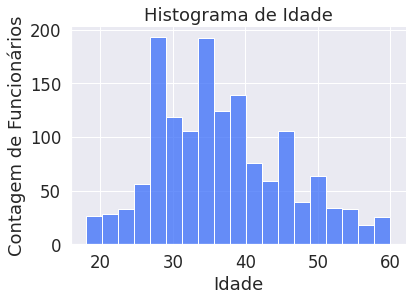

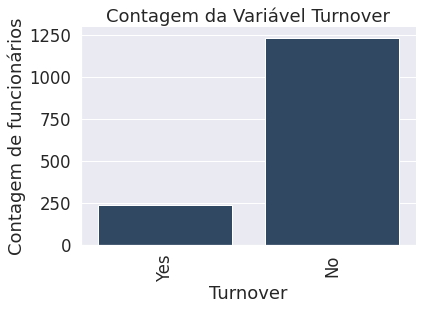

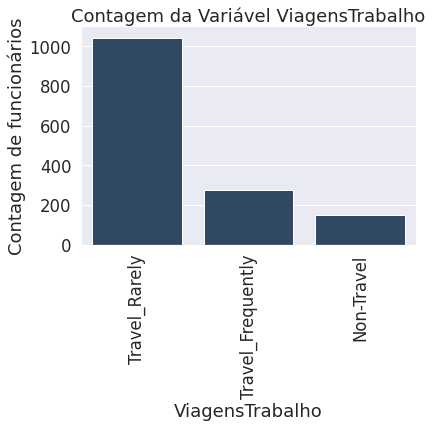

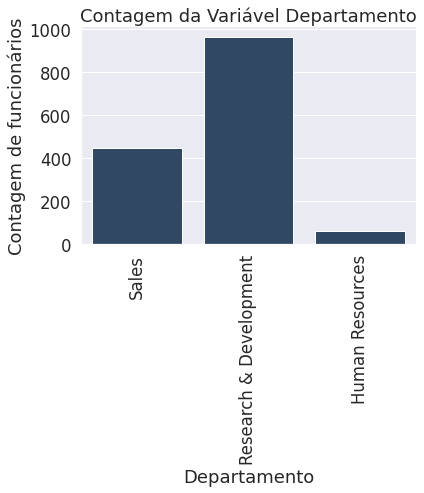

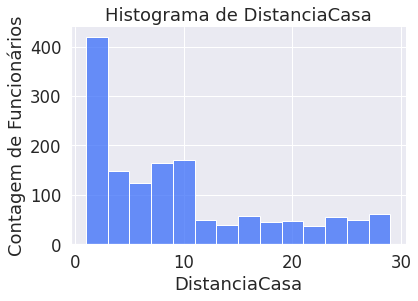

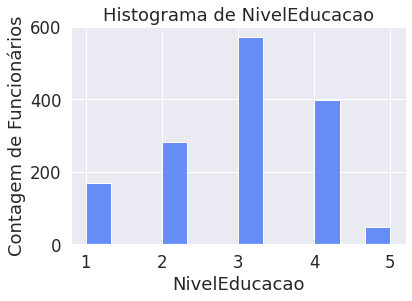

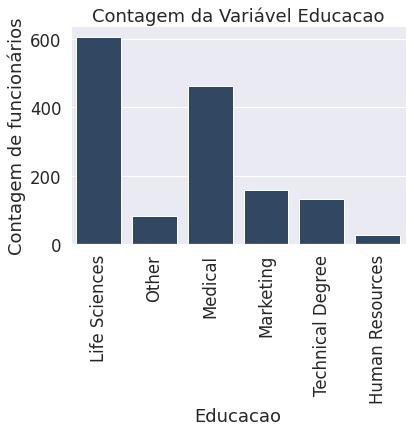

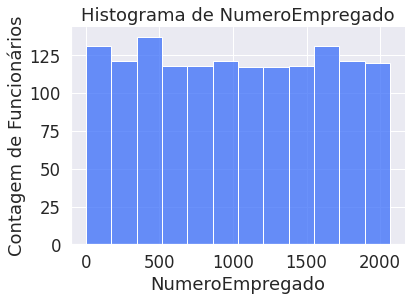

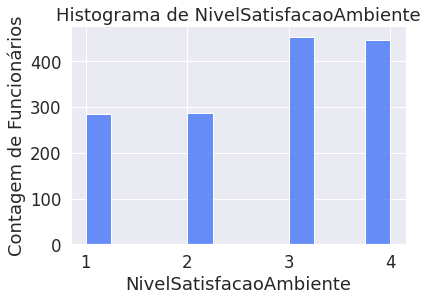

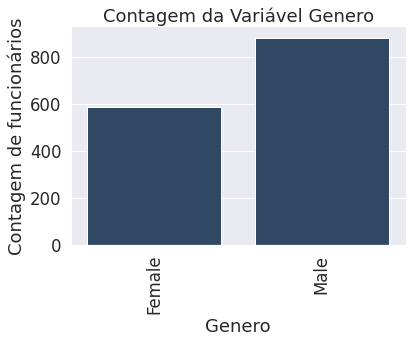

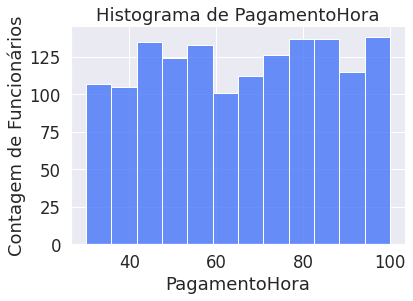

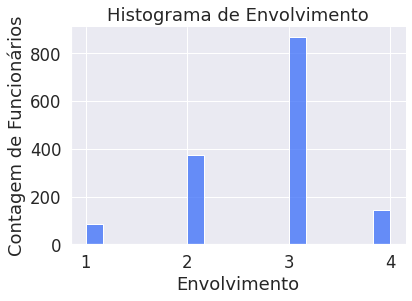

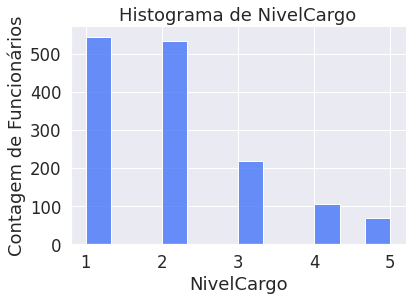

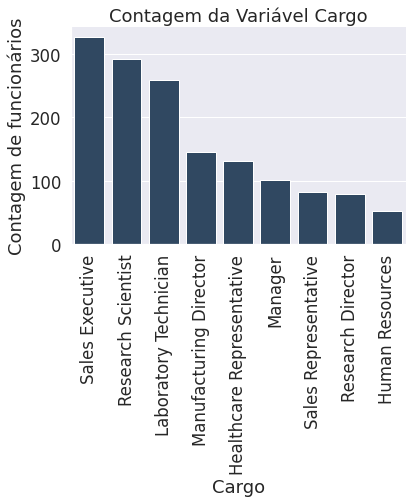

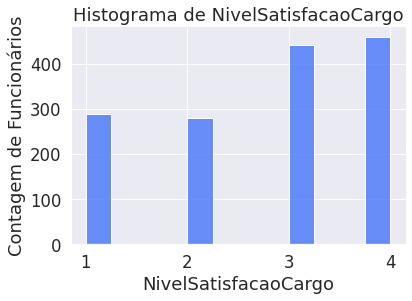

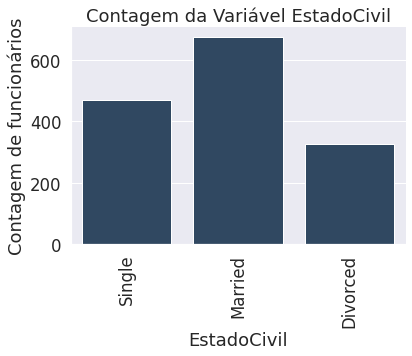

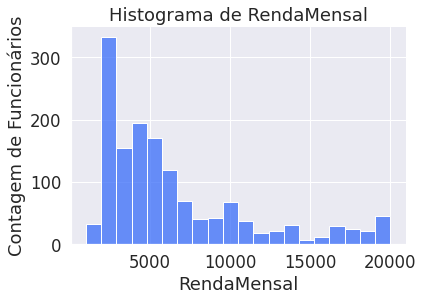

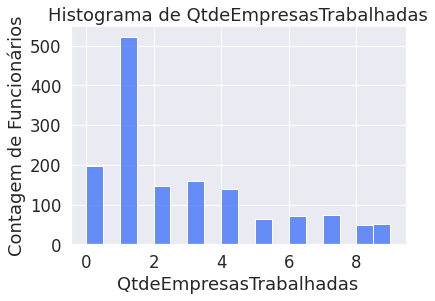

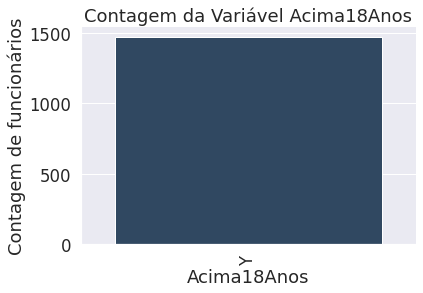

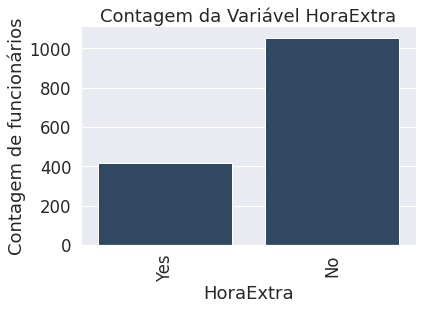

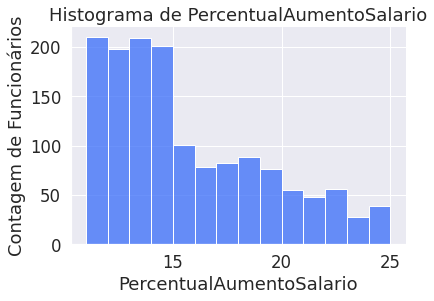

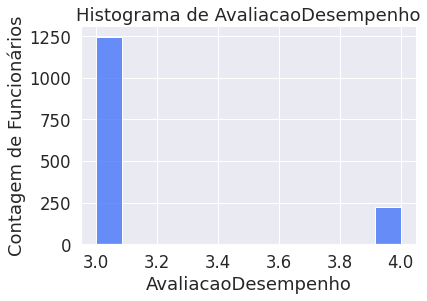

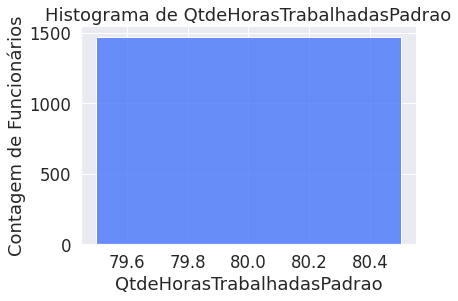

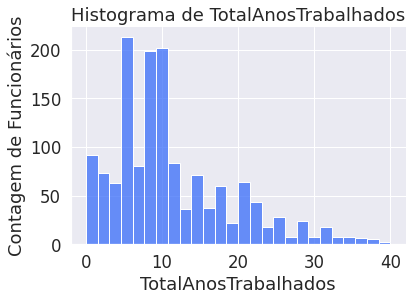

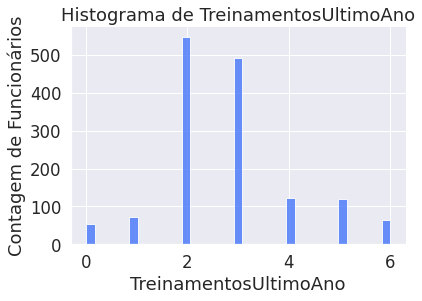

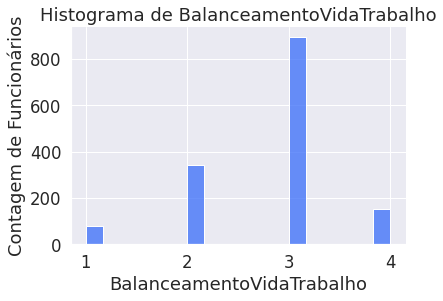

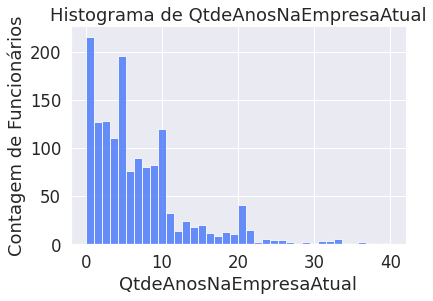

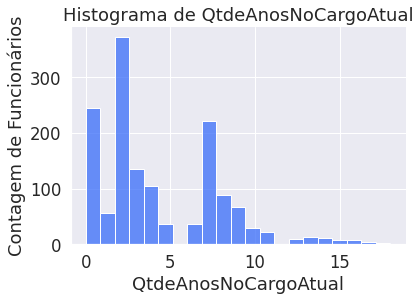

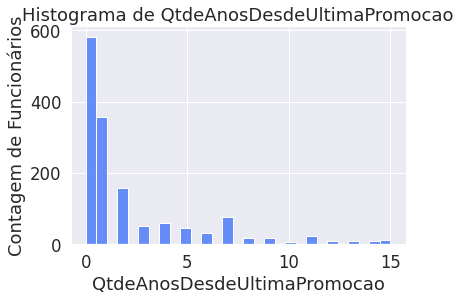

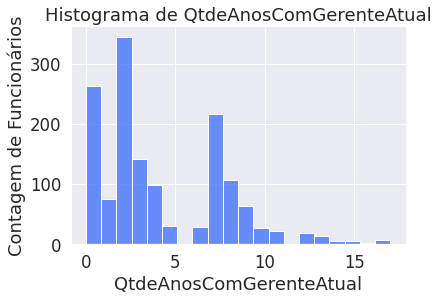

In [14]:
for col in df.columns:
  if col == "FAIXA_DE_ANOS_TRABALHADOS":
    continue
  if df.dtypes[col] == 'object':
    sns.countplot(col, data = df, color = '#284869')
    _ = plt.title("Contagem da Variável " + col)
    plt.ylabel('Contagem de funcionários')
    plt.xticks(rotation = 90)
    sns.despine()
    plt.show()
  else:
    sns.histplot(x = col, data = df)
    plt.title('Histograma de ' + col)
    plt.ylabel('Contagem de Funcionários')
    sns.despine()
    plt.show()


## Análises Multivariadas

In [ ]:
df['HoraExtra'] = df['HoraExtra'].map({ 'Yes' : 1, 'No' : 0   
})

df['Turnover'] = df['Turnover'].map({ 'Yes' : 1,
                                     'No' : 0   
})


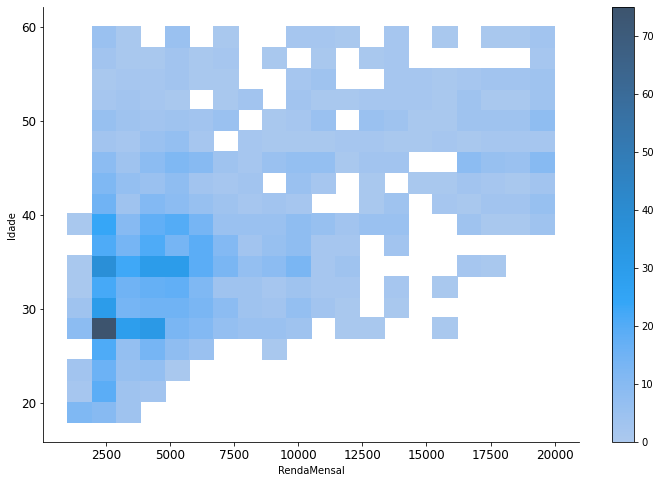

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.histplot(x = 'RendaMensal', y = 'Idade', data = df, ax = ax, cbar=True)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.despine()

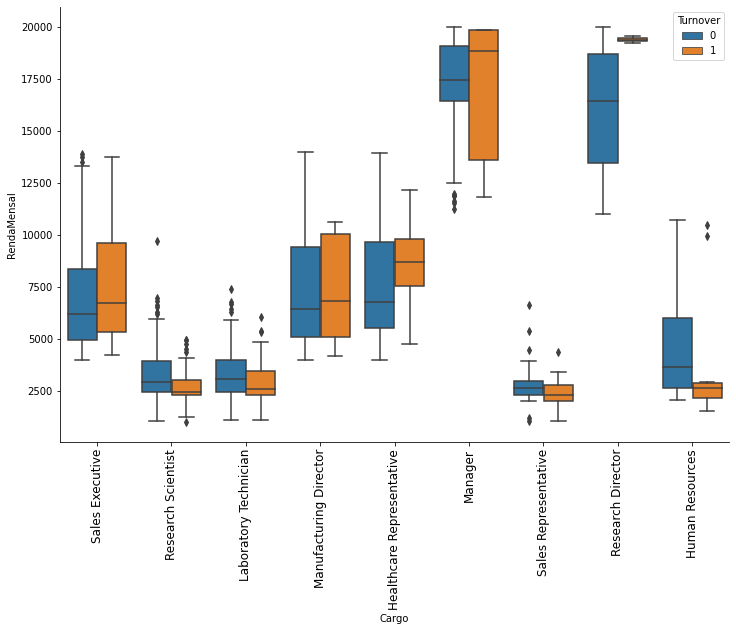

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot('Cargo', 'RendaMensal', hue = 'Turnover', data = df, ax = ax)
plt.xticks(rotation = 90, fontsize = 12)
sns.despine()

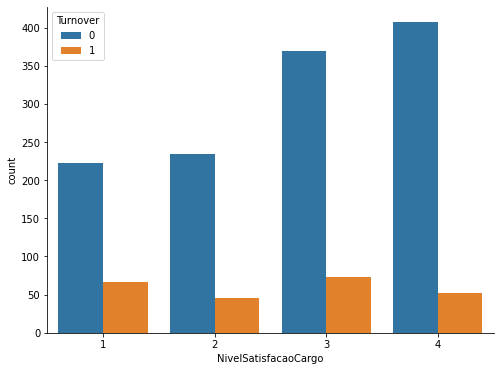

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot('NivelSatisfacaoCargo', hue = 'Turnover', data = df);
sns.despine()

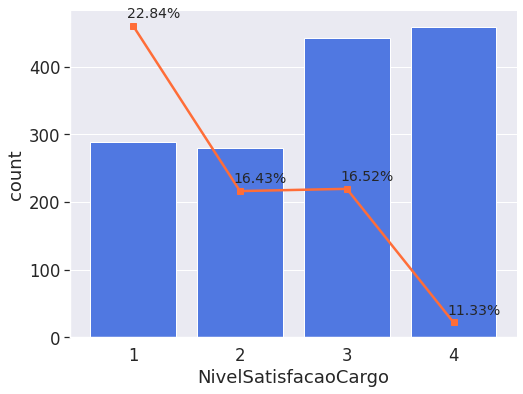

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
g = df.groupby('NivelSatisfacaoCargo')['Turnover'].mean().reset_index()
# g['Turnover'] *= 100
sns.countplot('NivelSatisfacaoCargo', data = df, ax = ax, color = '#386df9');

ax2 = ax.twinx()

ax2.plot(range(g['NivelSatisfacaoCargo'].nunique()), g['Turnover'], '-s', color ='#ff6d38')
ax2.grid(False)
ax2.get_yaxis().set_ticks([])

for x,y in zip(range(g['NivelSatisfacaoCargo'].nunique()), g['Turnover'].values):
    label = "{:.2%}".format(y)
    ax2.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(20,8),
                 size = 14, 
                 ha='center') 

sns.despine()

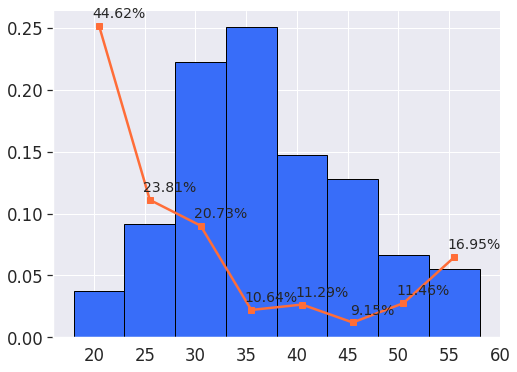

In [ ]:
spacing  = 5
bins = np.arange(df['Idade'].min(), df['Idade'].max(), spacing)

hist, _ = np.histogram(df['Idade'], bins = bins)

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(bins[:-1], hist / np.sum(hist), width=np.diff(bins), edgecolor="black", align="edge",color = '#386df9' );

ax2 = ax.twinx()

df['group'] = pd.cut(df['Idade'], len(bins) - 1)
g = df.groupby('group')['Turnover'].mean().reset_index()

ax2.plot(bins[:-1] + spacing / 2, g['Turnover'], '-s', color ='#ff6d38')
ax2.grid(False)
ax2.get_yaxis().set_ticks([])

for x,y in zip(np.array(bins) + spacing / 2, g['Turnover'].values):
    label = "{:.2%}".format(y)
    ax2.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(20,8),
                 size = 14, 
                 ha='center') 

sns.despine()

## Análises Estatísticas

In [ ]:
sns.regplot('TotalAnosTrabalhados', 'RendaMensal', data = df)
sns.despine()

In [ ]:
sns.regplot('TotalAnosTrabalhados', 'Idade', data = df)
sns.despine()


In [ ]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x= df['TotalAnosTrabalhados'], y= df['Idade'])

**Correlações**

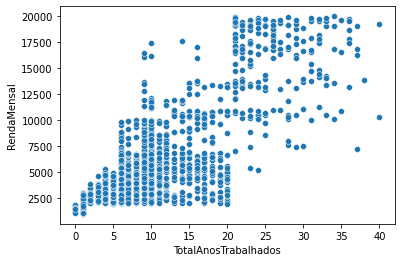

In [ ]:
sns.scatterplot('TotalAnosTrabalhados', 'RendaMensal', data = df)

In [ ]:
df.corr()

,Idade,DistanciaCasa,NivelEducacao,NumeroEmpregado,NivelSatisfacaoAmbiente,PagamentoHora,Envolvimento,NivelCargo,NivelSatisfacaoCargo,RendaMensal,QtdeEmpresasTrabalhadas,PercentualAumentoSalario,AvaliacaoDesempenho,QtdeHorasTrabalhadasPadrao,TotalAnosTrabalhados,TreinamentosUltimoAno,BalanceamentoVidaTrabalho,QtdeAnosNaEmpresaAtual,QtdeAnosNoCargoAtual,QtdeAnosDesdeUltimaPromocao,QtdeAnosComGerenteAtual,Log_Idade
Idade,1.000000,-0.011794,0.188978,-0.014954,0.013569,0.019006,0.030255,0.526272,-0.011794,0.513357,0.288980,-0.007376,0.000844,NaN,0.698466,-0.020780,-0.027600,0.329848,0.225214,0.223931,0.211615,0.988403
DistanciaCasa,-0.011794,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,-0.029251,0.040235,0.027110,NaN,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,-0.008354
NivelEducacao,0.188978,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,0.126317,-0.011111,-0.024539,NaN,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,0.209188
NumeroEmpregado,-0.014954,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,-0.001251,-0.012944,-0.020359,NaN,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.005520
NivelSatisfacaoAmbiente,0.013569,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.012594,-0.031701,-0.029548,NaN,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,0.010852
PagamentoHora,0.019006,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,0.022157,-0.009062,-0.002172,NaN,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,0.020622
Envolvimento,0.030255,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,0.015012,-0.017205,-0.029071,NaN,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,0.030584
NivelCargo,0.526272,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.142501,-0.034730,-0.021222,NaN,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,0.521792
NivelSatisfacaoCargo,-0.011794,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,-0.055699,0.020002,0.002297,NaN,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.011182
RendaMensal,0.513357,-0.017014,0.094961,-0.014829,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.149515,-0.027269,-0.017120,NaN,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,0.506706


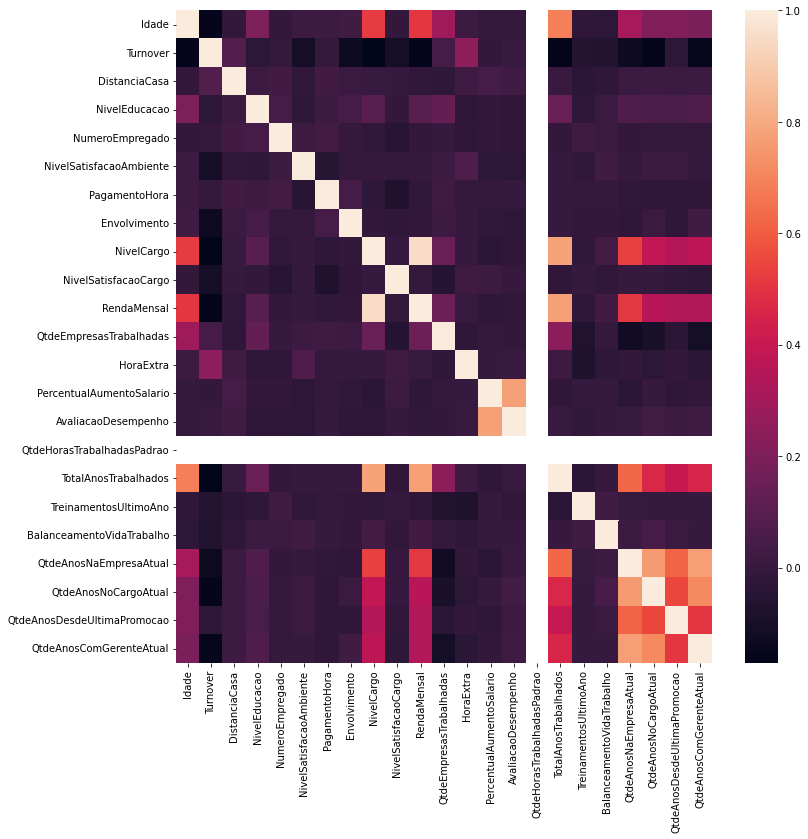

In [ ]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

In [ ]:
df.drop(columns = ['QtdeHorasTrabalhadasPadrao'], inplace = True)

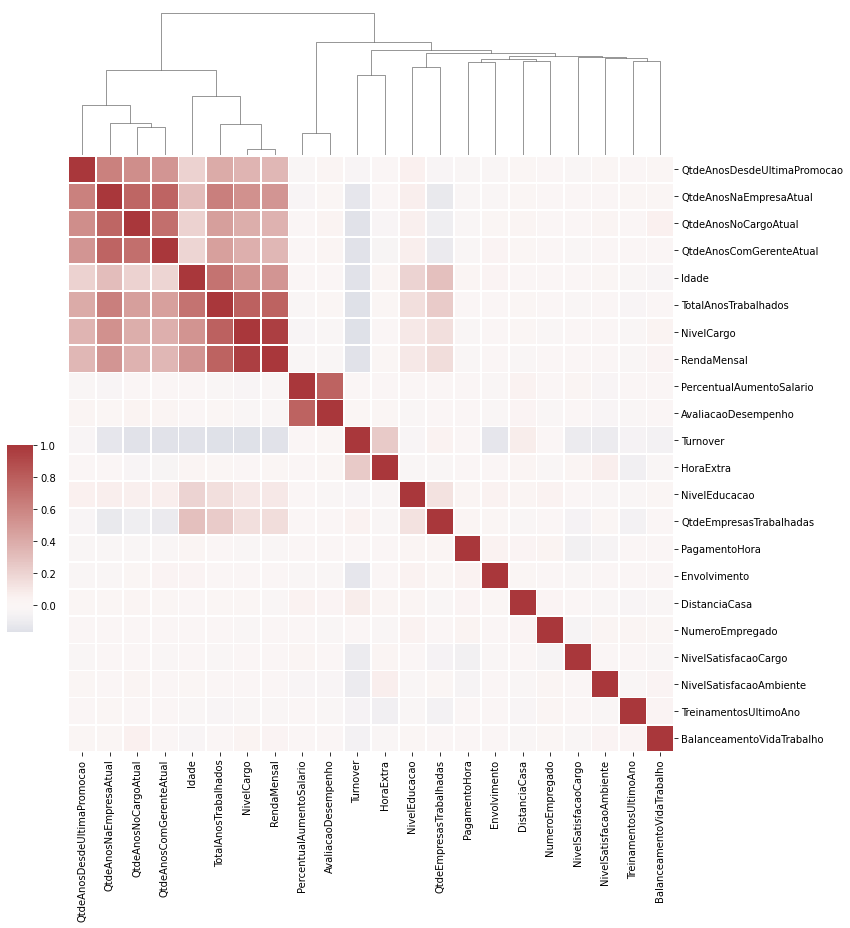

In [ ]:
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))
g.ax_row_dendrogram.remove()


In [ ]:
df.corr().style.background_gradient(cmap = 'coolwarm').set_precision(2)

,Idade,Turnover,DistanciaCasa,NivelEducacao,NumeroEmpregado,NivelSatisfacaoAmbiente,PagamentoHora,Envolvimento,NivelCargo,NivelSatisfacaoCargo,RendaMensal,QtdeEmpresasTrabalhadas,HoraExtra,PercentualAumentoSalario,AvaliacaoDesempenho,TotalAnosTrabalhados,TreinamentosUltimoAno,BalanceamentoVidaTrabalho,QtdeAnosNaEmpresaAtual,QtdeAnosNoCargoAtual,QtdeAnosDesdeUltimaPromocao,QtdeAnosComGerenteAtual
Idade,1.00,-0.16,-0.01,0.20,-0.01,0.02,0.02,0.03,0.52,-0.01,0.51,0.29,0.02,-0.01,-0.01,0.69,-0.02,-0.03,0.31,0.21,0.21,0.19
Turnover,-0.16,1.00,0.08,-0.03,-0.01,-0.10,-0.01,-0.13,-0.17,-0.10,-0.16,0.04,0.25,-0.01,0.00,-0.17,-0.06,-0.06,-0.13,-0.16,-0.03,-0.16
DistanciaCasa,-0.01,0.08,1.00,0.02,0.03,-0.02,0.03,0.01,0.01,-0.00,-0.02,-0.03,0.03,0.04,0.03,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
NivelEducacao,0.20,-0.03,0.02,1.00,0.04,-0.03,0.02,0.04,0.10,-0.01,0.09,0.13,-0.02,-0.01,-0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
NumeroEmpregado,-0.01,-0.01,0.03,0.04,1.00,0.02,0.04,-0.01,-0.02,-0.05,-0.01,-0.00,-0.02,-0.01,-0.02,-0.01,0.02,0.01,-0.01,-0.01,-0.01,-0.01
NivelSatisfacaoAmbiente,0.02,-0.10,-0.02,-0.03,0.02,1.00,-0.05,-0.01,0.00,-0.01,-0.01,0.01,0.07,-0.03,-0.03,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
PagamentoHora,0.02,-0.01,0.03,0.02,0.04,-0.05,1.00,0.04,-0.03,-0.07,-0.02,0.02,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
Envolvimento,0.03,-0.13,0.01,0.04,-0.01,-0.01,0.04,1.00,-0.01,-0.02,-0.02,0.02,-0.00,-0.02,-0.03,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
NivelCargo,0.52,-0.17,0.01,0.10,-0.02,0.00,-0.03,-0.01,1.00,-0.00,0.95,0.14,0.00,-0.03,-0.02,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
NivelSatisfacaoCargo,-0.01,-0.10,-0.00,-0.01,-0.05,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,-0.06,0.02,0.02,0.00,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03


In [ ]:
!pip install phik

In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

df.phik_matrix().style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(df.phik_matrix(), vmax=.8, vmin = -0.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.despine()

**Q-Q Plot**

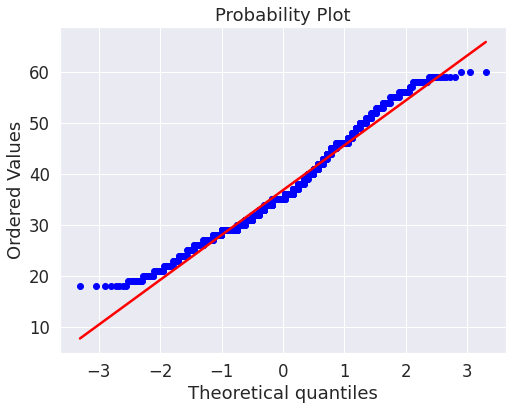

In [ ]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize = (8,6))
stats.probplot(df['Idade'], dist="norm", plot=plt)
plt.show()

**Teste Estatístico**

In [ ]:
from scipy.stats import shapiro

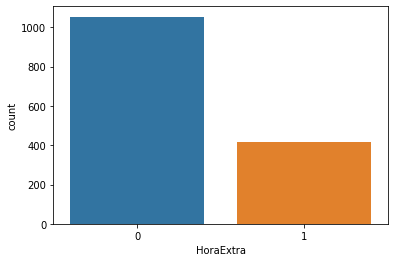

In [ ]:
sns.countplot('HoraExtra', data = df)

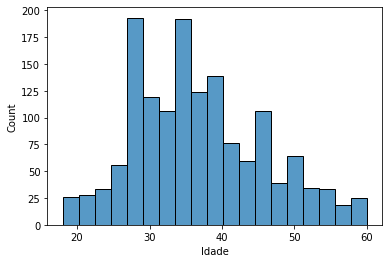

In [ ]:
sns.histplot(x = df['Idade'])

In [ ]:
shapiro(df['Idade'])

(0.9760664105415344, 6.377565593278277e-15)

In [ ]:
shapiro(np.log(df['Idade']))

(0.9894431829452515, 8.018827379885352e-09)

In [ ]:
from scipy.stats import shapiro

In [ ]:
dist = np.random.normal(0, 1, 1000)

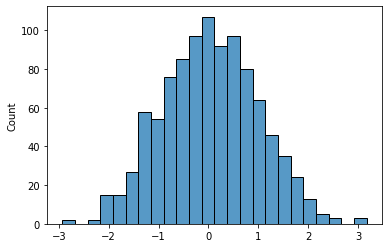

In [ ]:
sns.histplot(x = dist)

In [ ]:
shapiro(dist)

(0.9980158805847168, 0.2893359363079071)

In [ ]:
means = []
for i in range(1000):
  mean = df['TotalAnosTrabalhados'].sample(frac = 0.4, replace = True).mean()
  means.append(mean)
sns.histplot(x = means)

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
df.query('Turnover == 1').head()

,Idade,Turnover,ViagensTrabalho,Departamento,DistanciaCasa,NivelEducacao,Educacao,NumeroEmpregado,NivelSatisfacaoAmbiente,Genero,PagamentoHora,Envolvimento,NivelCargo,Cargo,NivelSatisfacaoCargo,EstadoCivil,RendaMensal,QtdeEmpresasTrabalhadas,Acima18Anos,HoraExtra,PercentualAumentoSalario,AvaliacaoDesempenho,TotalAnosTrabalhados,TreinamentosUltimoAno,BalanceamentoVidaTrabalho,QtdeAnosNaEmpresaAtual,QtdeAnosNoCargoAtual,QtdeAnosDesdeUltimaPromocao,QtdeAnosComGerenteAtual,FAIXA_DE_ANOS_TRABALHADOS
0,41.0,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,8,Y,1,11,3,8,0,1,6,4,0,5,"(6.0, 10.0]"
2,37.0,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,6,Y,1,15,3,7,3,3,0,0,0,0,"(6.0, 10.0]"
14,28.0,1,Travel_Rarely,Research & Development,24,3,Life Sciences,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,5,Y,1,14,3,6,4,3,4,2,0,3,"(-0.001, 6.0]"
21,36.0,1,Travel_Rarely,Sales,9,4,Life Sciences,27,3,Male,82,2,1,Sales Representative,1,Single,3407,7,Y,0,23,4,10,4,3,5,3,0,3,"(6.0, 10.0]"
24,34.0,1,Travel_Rarely,Research & Development,6,1,Medical,31,2,Male,83,3,1,Research Scientist,1,Single,2960,2,Y,0,11,3,8,2,3,4,2,1,3,"(6.0, 10.0]"


In [ ]:
!pip install --upgrade scipy

     |████████████████████████████████| 38.1 MB 1.6 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
ttest_ind(df.query('Turnover == 1')['Idade'], df.query('Turnover == 0')['Idade'], alternative = 'less')

Ttest_indResult(statistic=-5.9889073678080145, pvalue=1.3261201316361038e-09)

In [ ]:
shapiro(df.query('Turnover == 1')['Idade'])

ShapiroResult(statistic=0.9496654272079468, pvalue=2.547285475884564e-07)

In [ ]:
shapiro(df.query('Turnover == 0')['Idade'])

ShapiroResult(statistic=0.9757171869277954, pvalue=1.5327111324917042e-13)

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
wilcoxon(df.query('Turnover == 1')['Idade'].sample(200), df.query('Turnover == 0')['Idade'].sample(200), alternative = 'less').pvalue

8.093927349038762e-06

In [ ]:
tests = []
for i in range(1000):
  pvalue = wilcoxon(df.query('Turnover == 1')['Idade'].sample(200), df.query('Turnover == 0')['Idade'].sample(200), alternative = 'less').pvalue
  tests.append(pvalue)

In [ ]:
(np.array(tests) < 0.05).sum() / len(tests)

In [ ]:
(np.array(tests) < 0.05).sum()

1000

In [ ]:
from scipy.stats import f_oneway
CategoryGroupLists= df.groupby('Turnover')['DistanciaCasa'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])  